### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
# <font color = A97155 >Project: Investigate a Dataset - [ No Show Appointments ] </font>

## <font color = 8FBDD3 >Table of Contents </font>
><ul>
><li><a href="#intro">Introduction</a></li>
><li><a href="#wrangling">Data Wrangling</a></li>
><li><a href="#eda">Exploratory Data Analysis</a></li>
><li><a href="#conclusions">Conclusions</a></li>
></ul>


<a id='intro'></a>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# *<font color=A97155>  Introduction :</font>*
### <font color=E4D1B9>-----------------------------</font>

##  <font color=8FBDD3>- Dataset Description :</font> 
>### <font color = BE8C63 >This dataset collects information from 100k medical appointments in Brazil</font>
>### <font color = BE8C63 >It is focused on the question of whether patients show up or not for their appointment</font>
>### <font color = BE8C63 >A number of characteristics about the patient are included in each row.</font>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
## <font color = 8FBDD3>- Question(s) for Analysis :</font>
>###  <font color =BE8C63 >What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</font>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>


In [78]:
# Importing the packages :
import pandas as pd
pd.options.display.max_rows = 999999
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# *<font color=A97155>Data Wrangling:</font>*
### <font color=E4D1B9>-----------------------------------</font>
### *<font color=E4D1B9>Loading Data</font>*

In [79]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv');
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### <font color = E4D1B9 >Having a look into DF Columns Types and Nulls</font>

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### *<font color=E4D1B9>Seeking Data Boundaries and Outliers</font>*

In [81]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### *<font color=E4D1B9>Identifying Consistency of data and uniques  </font>*

In [82]:
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
##  <font color=8FBDD3> Initial thoughts :</font>
 ### <font color=E4D1B9>-----------------------------</font>
> #### *<font color = BE8C63 >-Patient id should be int </font>*
> #### *<font color = BE8C63 >-Schedule and appointment day need to be converted into datetime </font>*
> > #### *<font color = BE8C63 >-We need to create Number of days column to show difference between them </font>*
> > #### *<font color = BE8C63 >-We may need Day of Week column for appointment date </font>*
> #### *<font color = BE8C63 >-Age minimum value is -1 and maximum is 115 which is unlikely to happen </font>*
> #### *<font color = BE8C63 >-Handcap should be boolean, but we have values higher than 1 </font>*
> #### *<font color = BE8C63 >-We have here fewer patients than Appointments that means every patient probably had more than 1 Appointment</font>*
>> #### *<font color = BE8C63 >-We can say every patient may have had 1.774 appointments </font>*
>> #### *<font color = BE8C63 >-Also the appointment ids seems to be more consistent ,so we can use it as an index </font>*

In [83]:
df.set_index('AppointmentID', drop=True, inplace=True)


### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# <font color=8FBDD3>Data Cleaning:</font>
### <font color=E4D1B9>-------------------------------</font>
### *<font color=E4D1B9>Changing Types for easier Operations on data</font>*

In [84]:
#Changing Types of some columns
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### *<font color=E4D1B9>Extracting Some information from columns to other columns</font>*

In [85]:
#creating some columns we may need
df['NumOfDays']=(df['AppointmentDay']-df['ScheduledDay']).dt.days
#some values are negative so we will drop them
df=df[(df.NumOfDays>=0)]
df['AppointmentDOW'] = df['AppointmentDay'].dt.strftime("%A")
df['ScheduleDOW'] = df['ScheduledDay'].dt.strftime("%A")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 5642903 to 5629448
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110522 non-null  int64         
 1   Gender          110522 non-null  object        
 2   ScheduledDay    110522 non-null  datetime64[ns]
 3   AppointmentDay  110522 non-null  datetime64[ns]
 4   Age             110522 non-null  int64         
 5   Neighbourhood   110522 non-null  object        
 6   Scholarship     110522 non-null  int64         
 7   Hipertension    110522 non-null  int64         
 8   Diabetes        110522 non-null  int64         
 9   Alcoholism      110522 non-null  int64         
 10  Handcap         110522 non-null  int64         
 11  SMS_received    110522 non-null  int64         
 12  No-show         110522 non-null  object        
 13  NumOfDays       110522 non-null  int64         
 14  AppointmentDOW  110522 non-nu

Text(0.5, 1.0, 'Age Distribution')

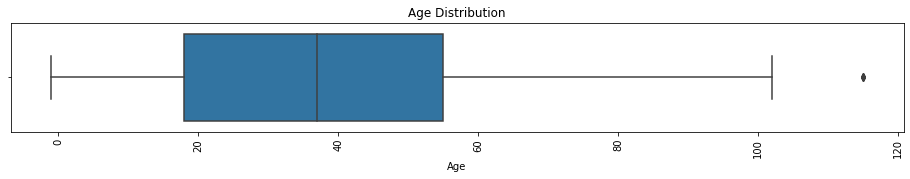

In [86]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)
plt.xlabel('Age')
plt.title('Age Distribution')

### *<font color=E4D1B9>The mean age is around 37 but that data has some outliers</font>*

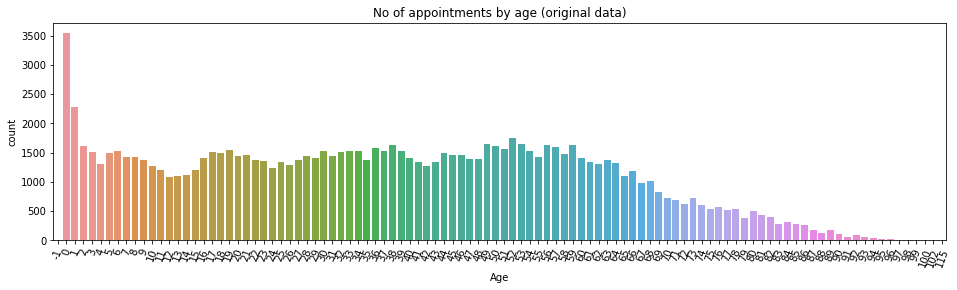

In [87]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=70)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by age (original data)")
plt.show()

### *<font color=E4D1B9>Seems it has some outliers it's better to drop them</font>*

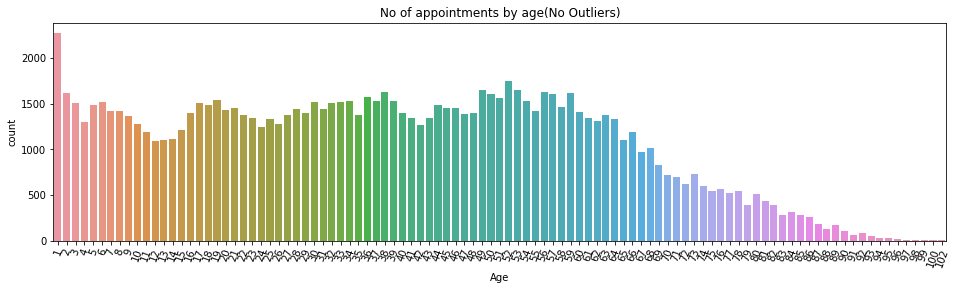

In [88]:
#Dropping Outlier Values
df=df[(df.Age>0) & (df.Age<110)]
plt.figure(figsize=(16,4))
plt.xticks(rotation=70)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by age(No Outliers)")
plt.show()

### *<font color=E4D1B9>Handicap Values ranges from 0 to 4 </font>*

In [89]:
#HandCap values
df['Handcap'].value_counts()

0    104743
1      2035
2       183
3        13
4         3
Name: Handcap, dtype: int64

### *<font color=E4D1B9>We can set higher values to 1 so we can use it as Boolean</font>*

In [90]:
#We can set any value higher than 0 to 1
df['Handcap'] = np.where(df['Handcap']>0, 1, 0)
df['Handcap'].value_counts()

0    104743
1      2234
Name: Handcap, dtype: int64

### *<font color=E4D1B9>Seeing The highest 20 patients with more appointments than others</font>*

In [91]:
#Some patient had more than 1 appointment
df['PatientId'].value_counts()[:20]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
75797461494159     62
258424392677       62
6264198675331      62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
65433599726992     46
14479974122994     46
81894521843749     42
9452745294842      42
188232341789524    40
9496196639835      38
2271579924275      38
Name: PatientId, dtype: int64

### *<font color=E4D1B9>Seeing Changes on Data</font>*

In [92]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NumOfDays
count,1.069770e+05,106977.000000,106977.000000,106977.000000,106977.000000,106977.000000,106977.000000,106977.000000,106977.000000
mean,1.472772e+14,38.312731,0.101040,0.203782,0.074250,0.031409,0.020883,0.323284,10.167214
std,2.558165e+14,22.460430,0.301384,0.402811,0.262178,0.174420,0.142993,0.467732,15.263681
min,3.921700e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172982e+12,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171784e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


### *<font color=E4D1B9>Seeing Changes on Data Types</font>*

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106977 entries, 5642903 to 5629448
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106977 non-null  int64         
 1   Gender          106977 non-null  object        
 2   ScheduledDay    106977 non-null  datetime64[ns]
 3   AppointmentDay  106977 non-null  datetime64[ns]
 4   Age             106977 non-null  int64         
 5   Neighbourhood   106977 non-null  object        
 6   Scholarship     106977 non-null  int64         
 7   Hipertension    106977 non-null  int64         
 8   Diabetes        106977 non-null  int64         
 9   Alcoholism      106977 non-null  int64         
 10  Handcap         106977 non-null  int32         
 11  SMS_received    106977 non-null  int64         
 12  No-show         106977 non-null  object        
 13  NumOfDays       106977 non-null  int64         
 14  AppointmentDOW  106977 non-nu

### *<font color=E4D1B9>Initial Look on distibutions</font>*

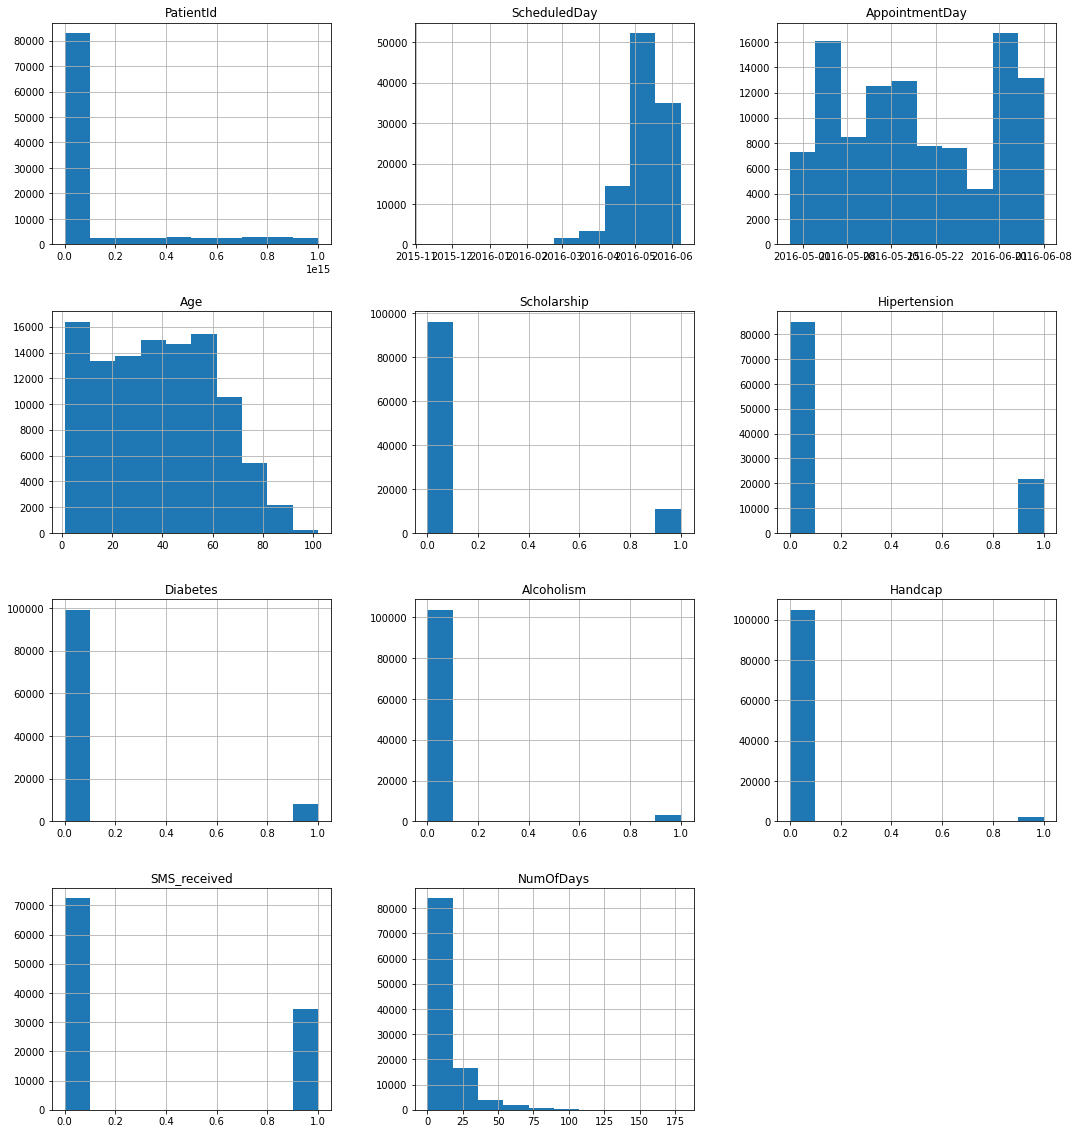

In [94]:
df.hist(figsize=(18,20));

### *<font color=E4D1B9>Seeing the main topic of analysis the No-show ratio</font>*

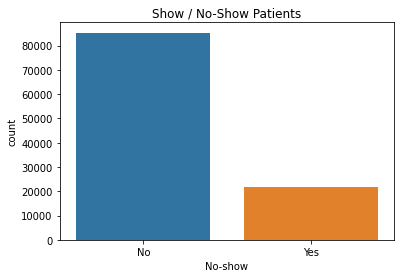

20 % Did not Show


In [95]:
#Getting percent of patients who did not show
ax = sns.countplot(x=df['No-show'], data=df)
ax.set_title("Show / No-Show Patients")
plt.show()
percent=round(df['No-show'].value_counts()[1]/df['No-show'].count()*100)
print(str(percent)+' % Did not Show')

### *<font color=E4D1B9>Plotting Categorical Data considering the show/no-show column</font>*

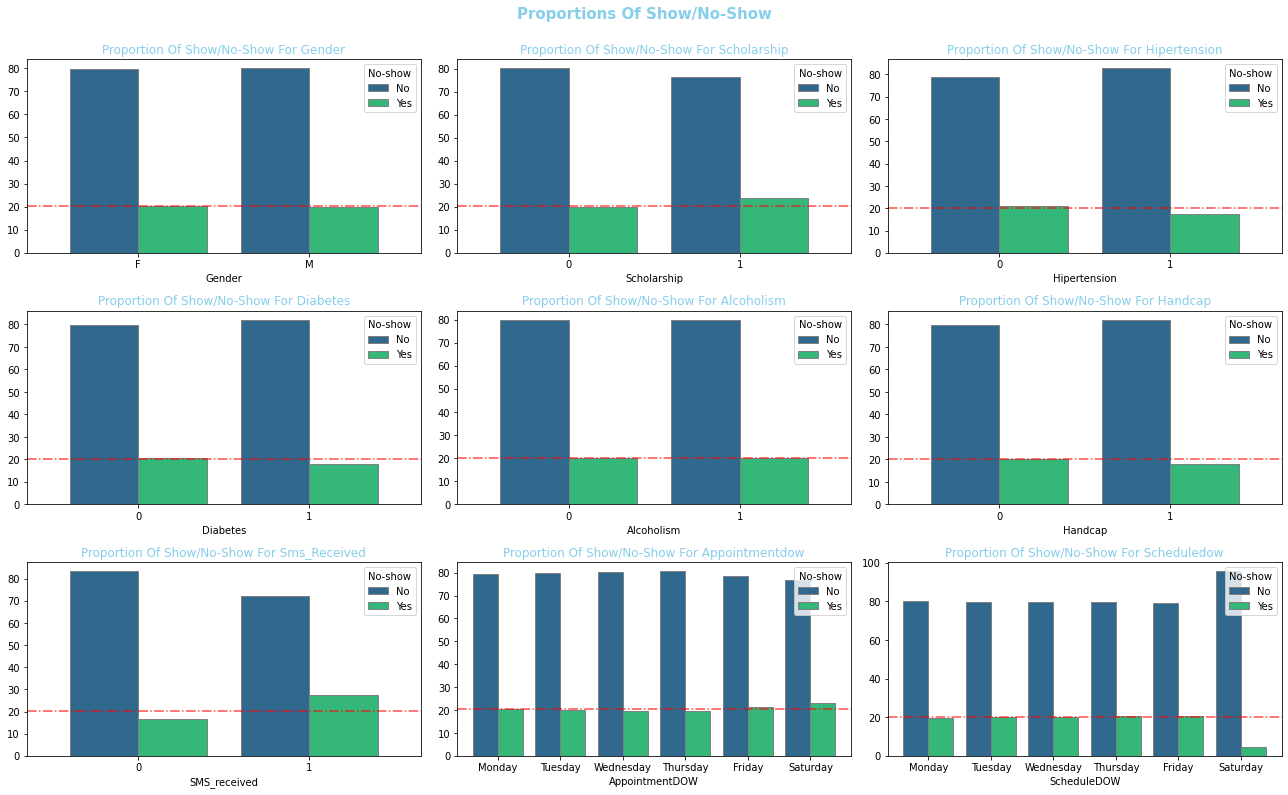

In [96]:
categ_col = ['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','AppointmentDOW','ScheduleDOW']
fig = plt.figure(figsize=(18, 11))
j=0
for i in categ_col:
    if i == 'AppointmentDOW' or i == 'ScheduleDOW':
        order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    else:order = None
    ax = fig.add_subplot(3, 3, j+1)
    df.groupby(i)['No-show'].value_counts(normalize=True).unstack('No-show').reindex(order).mul(100).plot.bar(ax=ax,
                                                                                                              edgecolor='gray',
                                                                                                              rot=0,
                                                                                                              width=0.8,
                                                                                                              color=sns.color_palette('viridis',n_colors=2))
    ax.set_title(f'Proportion of Show/No-show for {i}'.title(),c='skyblue')
    #this line shows the ration of no show for all appointments
    plt.axhline(df['No-show'].value_counts(normalize=True)['Yes']*100,color='red',ls='-.',alpha=0.7)
    j+=1
plt.suptitle('Proportions of Show/No-show'.title(),y=1,fontsize=15,weight='bold',c='skyBlue');
plt.tight_layout()

> ### <font color = BE8C63 >For categorical Data Most of the distributions look similar they confirm the 20% of no show but there is no clear indication of having an impact on [ show / no_show ] situation</font>

### *<font color=E4D1B9>Making a Function for bar plotting any column divided with Show/No-show column</font>*

In [97]:
#Filtering data for show and no show
show = df['No-show'] == 'No'
NoShow = df['No-show']=='Yes'
def percentageplot(df,column_name,color=sns.color_palette('viridis',n_colors=2),FigSize=(14,6)):
    '''
    Args:
        df: DataFrame
        column_name: Column to plot
        color: Color pallet (default Viridis)
        FigSize: Size of Figure

    Returns: Barplot for column considering Show/No-show
    '''
    df.groupby(column_name)['No-show'].value_counts(normalize=True).unstack('No-show').mul(100).plot.bar(figsize=FigSize,
                                                                                                         edgecolor='gray',
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=color)
    plt.title(f'Percentage of Show/No-show for {column_name}'.title(),fontsize=15,weight='bold',c='skyBlue');
    plt.xlabel(column_name.title(),fontsize=15,weight='bold',c='skyBlue')
    plt.ylabel('Percentage'.title(),fontsize=15,weight='bold',c='skyBlue')
    plt.axhline(df['No-show'].value_counts(normalize=True)['Yes']*100,color='red',ls='-.',alpha=0.7)
    plt.legend()
    plt.show()


### *<font color=E4D1B9>Testing the function using Age and NumberOfDays Columns</font>*

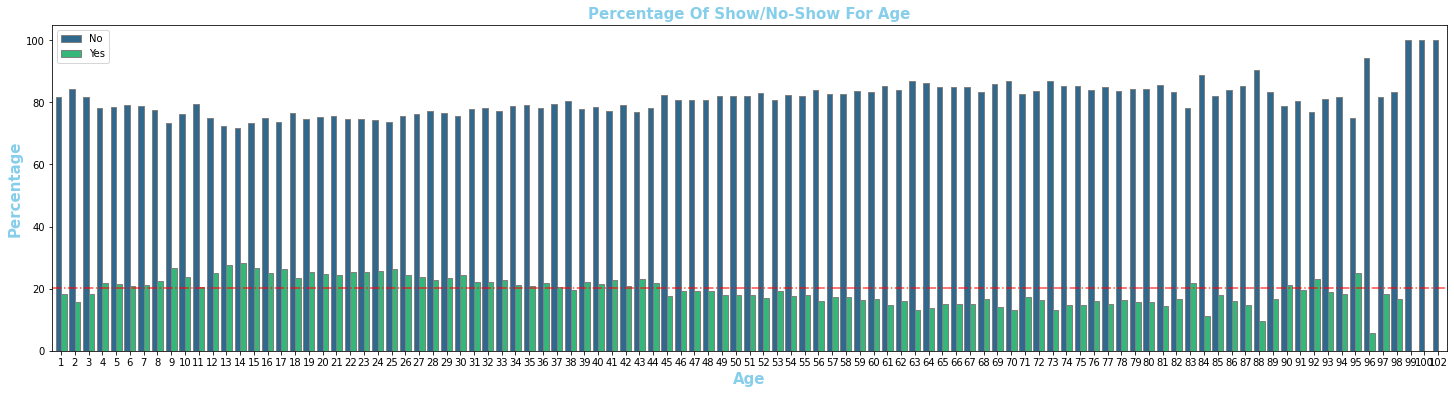

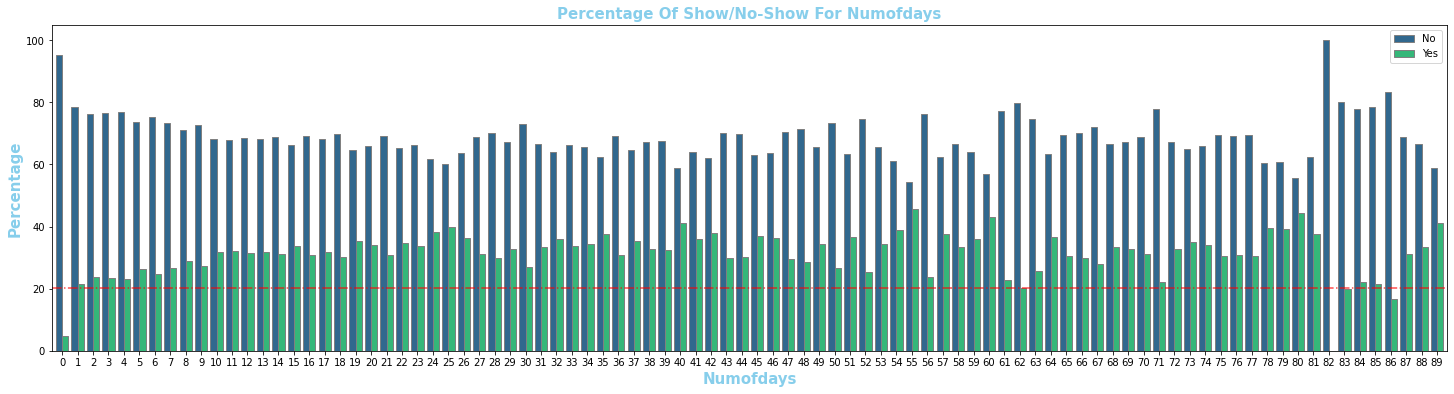

In [98]:
Age=fig.add_subplot(2,1,1)
Age=percentageplot(df,'Age',FigSize=(25,6))
Nod=fig.add_subplot(2,1,1)
# we query days less than 90 for clear results with no outliers
Nod=percentageplot(df.query('NumOfDays<90'),'NumOfDays',FigSize=(25,6))

> ### <font color = BE8C63 >For Age it is clear that the percent of show is higher in range of [0-60] than the rest </font>
> ### <font color = BE8C63 >For Number of days waiting it is clear that the percent of no-show is really low at 0 days waiting and increases over longer periods </font>

<a id='conclusions'></a>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
# *<font color=A97155>Conclusions :</font>*
### <font color=E4D1B9>--------------------------</font>
> #### <font color = BE8C63 >1- The distribution of appointments among days of week (Monday-Friday) is almost equal with a little less visits on Thursday and Friday. There are 24 visits on Saturday and none on Sunday. </font>
> #### <font color = BE8C63 >2- Almost 40 thousand patients scheduled for the same day.</font>
> > #### <font color = BE8C63 >Only 5% of them did not show up </font>
> #### <font color = BE8C63 >3- Most of patients did not have these diseases </font>
> #### <font color = BE8C63 >4- Around 20% of appointments were missed </font>

### <font color = 8FBDD3 >Final conclusion : Patients Scheduling for the same day are more likely to show</font>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
### <font color = 8FBDD3 >Limitations:</font>
> #### <font color = BE8C63 >Not too many limitations ,the data was already cleaned :D, maybe some problems with visualizations because most of them are similar</font>
### <font color=E4D1B9>-------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>
